In [1]:
import sys
# Add the src directory to the sys.path to be able to import from it
sys.path.insert(0, '/Users/giladrubin/python_workspace/ml_utils/src')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [4]:
df = pd.read_csv("../../data/AmesHousing.csv")
df.head()
df = df.select_dtypes(include="number")
df.dropna(inplace=True)
# Split the data
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(df.drop("SalePrice", axis=1), df["SalePrice"], test_size=test_size, random_state=42)
X_train["random_feature"] = np.random.random(X_train.shape[0])
X_train["Overall Qual Noise"] = X_train["Overall Qual"] + (X_train["random_feature"] * 0.0001)

In [10]:
from synergy_matrix import CVEvaluator, SynergyMatrix

In [11]:
# Initialize evaluator and calculator
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model = DecisionTreeRegressor(max_depth=10, random_state=42)
model = RandomForestRegressor(max_depth=10, n_estimators=10, random_state=42, n_jobs=-1)

In [20]:
from sklearn.metrics import mean_absolute_error
evaluator = CVEvaluator(model=model, scorer="neg_mean_absolute_percentage_error", n_splits=5)

In [21]:
synergy_matrix = SynergyMatrix(model, evaluator)

In [22]:
%%time
# Calculate interactions and plot
synergy_matrix.calculate_synergy_matrix(X_train, y_train)

CPU times: user 2.95 s, sys: 850 ms, total: 3.8 s
Wall time: 39.6 s


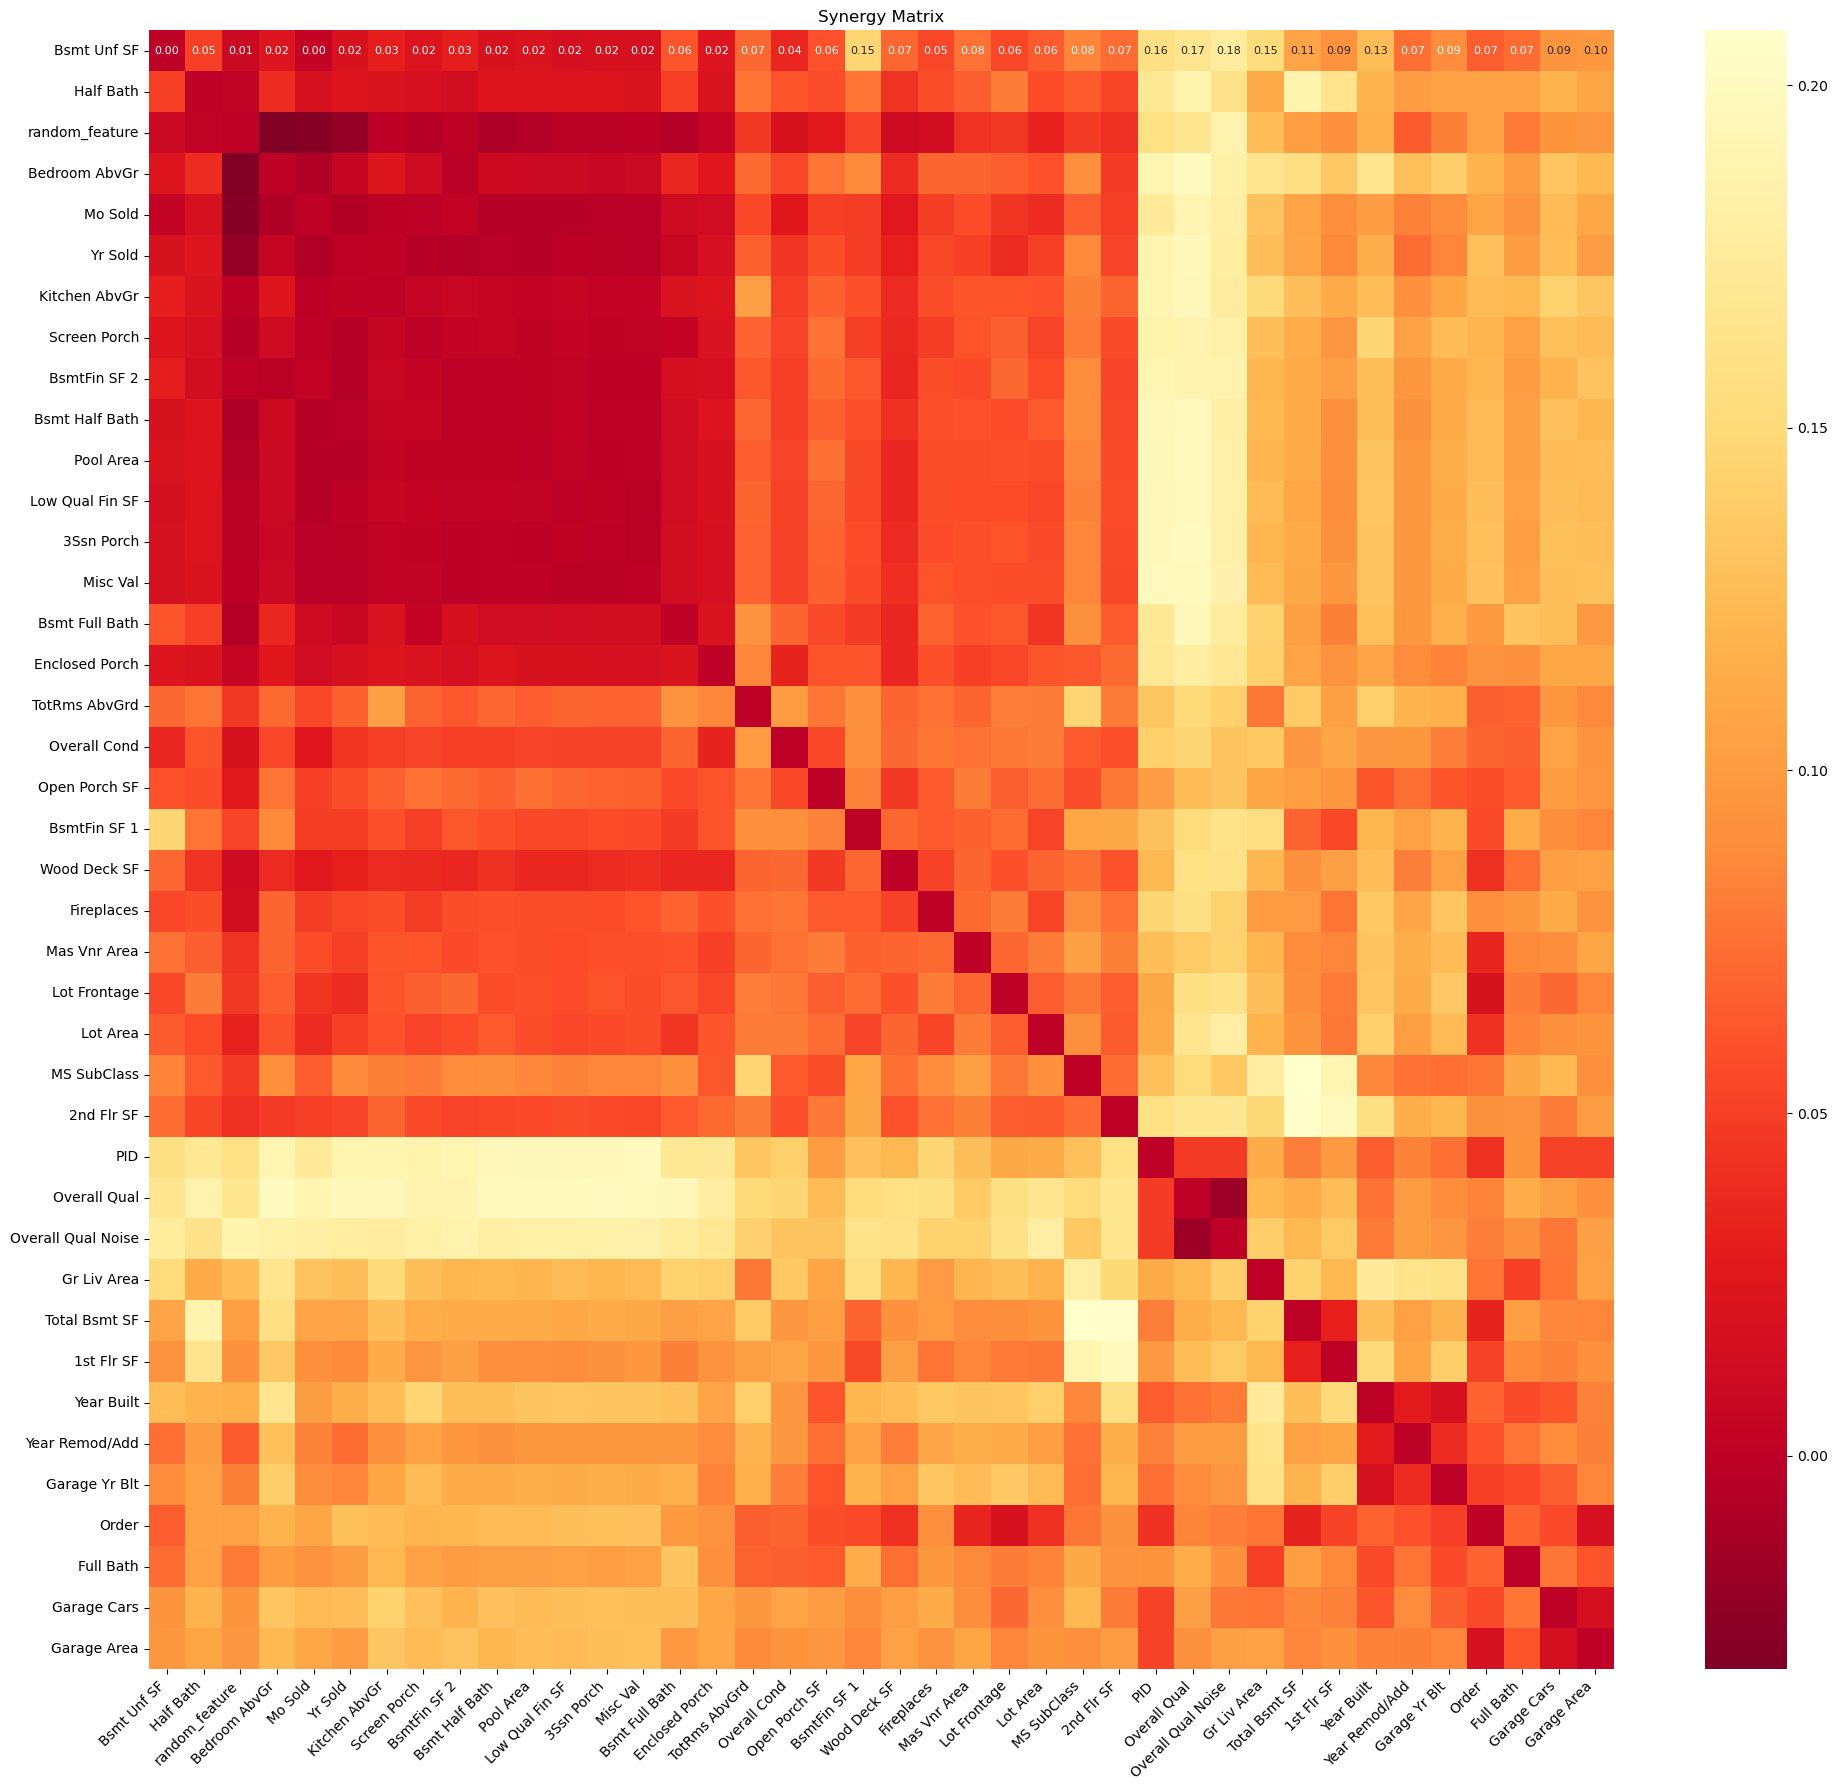

In [23]:
synergy_matrix.plot_matrix()

In [24]:
synergy_matrix.matrix

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,random_feature,Overall Qual Noise
Order,0.000000,0.042357,0.077595,0.020018,0.041772,0.083995,0.069494,0.068335,0.059886,0.035137,...,0.057612,0.093432,0.129085,0.120200,0.124597,0.130024,0.107857,0.129138,0.104852,0.081149
PID,0.042357,0.000000,0.129045,0.111759,0.112160,0.047835,0.141508,0.065760,0.083363,0.128558,...,0.100131,0.169902,0.194969,0.187434,0.196164,0.197297,0.172905,0.188578,0.159183,0.047588
MS SubClass,0.077595,0.129045,0.000000,0.078845,0.090984,0.151177,0.063949,0.085997,0.076257,0.103345,...,0.057874,0.063109,0.085591,0.080618,0.085883,0.085261,0.065790,0.086683,0.047414,0.134372
Lot Frontage,0.020018,0.111759,0.078845,0.000000,0.065954,0.157611,0.078612,0.132882,0.113199,0.070286,...,0.066609,0.054314,0.060525,0.066338,0.059451,0.058395,0.043680,0.039500,0.045605,0.161085
Lot Area,0.041772,0.112160,0.090984,0.065954,0.000000,0.166872,0.080631,0.139920,0.102174,0.080703,...,0.072766,0.061780,0.056314,0.052572,0.057958,0.058450,0.039746,0.050937,0.033199,0.179816
Overall Qual,0.083995,0.047835,0.151177,0.157611,0.166872,0.000000,0.145709,0.075492,0.101293,0.136610,...,0.125198,0.178875,0.199139,0.187557,0.197880,0.198260,0.189977,0.194937,0.166938,-0.016656
Overall Cond,0.069494,0.141508,0.063949,0.078612,0.080631,0.145709,0.000000,0.095277,0.096885,0.075626,...,0.055332,0.033982,0.051400,0.052268,0.052712,0.051624,0.025398,0.043775,0.019821,0.131866
Year Built,0.068335,0.065760,0.085997,0.132882,0.139920,0.075492,0.095277,0.000000,0.028894,0.131490,...,0.062131,0.106722,0.132066,0.145809,0.131817,0.131942,0.100704,0.116351,0.116681,0.079783
Year Remod/Add,0.059886,0.083363,0.076257,0.113199,0.102174,0.101293,0.096885,0.028894,0.000000,0.115782,...,0.073548,0.087690,0.097412,0.105594,0.097520,0.095938,0.083466,0.072850,0.064496,0.100637
Mas Vnr Area,0.035137,0.128558,0.103345,0.070286,0.080703,0.136610,0.075626,0.131490,0.115782,0.000000,...,0.080366,0.050655,0.058540,0.060404,0.057746,0.059385,0.056810,0.051021,0.042970,0.143221


In [25]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

matrix = synergy_matrix.matrix
# Transforming interaction scores to positive distances
scaler = MinMaxScaler(feature_range=(0, 1))
distance_matrix = scaler.fit_transform(-matrix)  # Negating to invert closeness to distance

# Since AgglomerativeClustering uses proximity (not distance directly), we might use 1 - scaled values
proximity_matrix = 1 - distance_matrix

In [26]:
# Initialize Agglomerative Clustering
clustering = AgglomerativeClustering(n_clusters=None, metric='precomputed', linkage='average', distance_threshold=0.2)
clusters = clustering.fit_predict(proximity_matrix)

NameError: name 'AgglomerativeClustering' is not defined

In [ ]:
def plot_dendrogram(model, labels, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # Create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # Leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    plt.figure(figsize=(20, 10))  # Increase the figure size
    dendrogram(linkage_matrix, labels=labels, **kwargs)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel("Features")
    plt.ylabel("Distance (or Proximity)")
    plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate feature names for better readability
    plt.show()

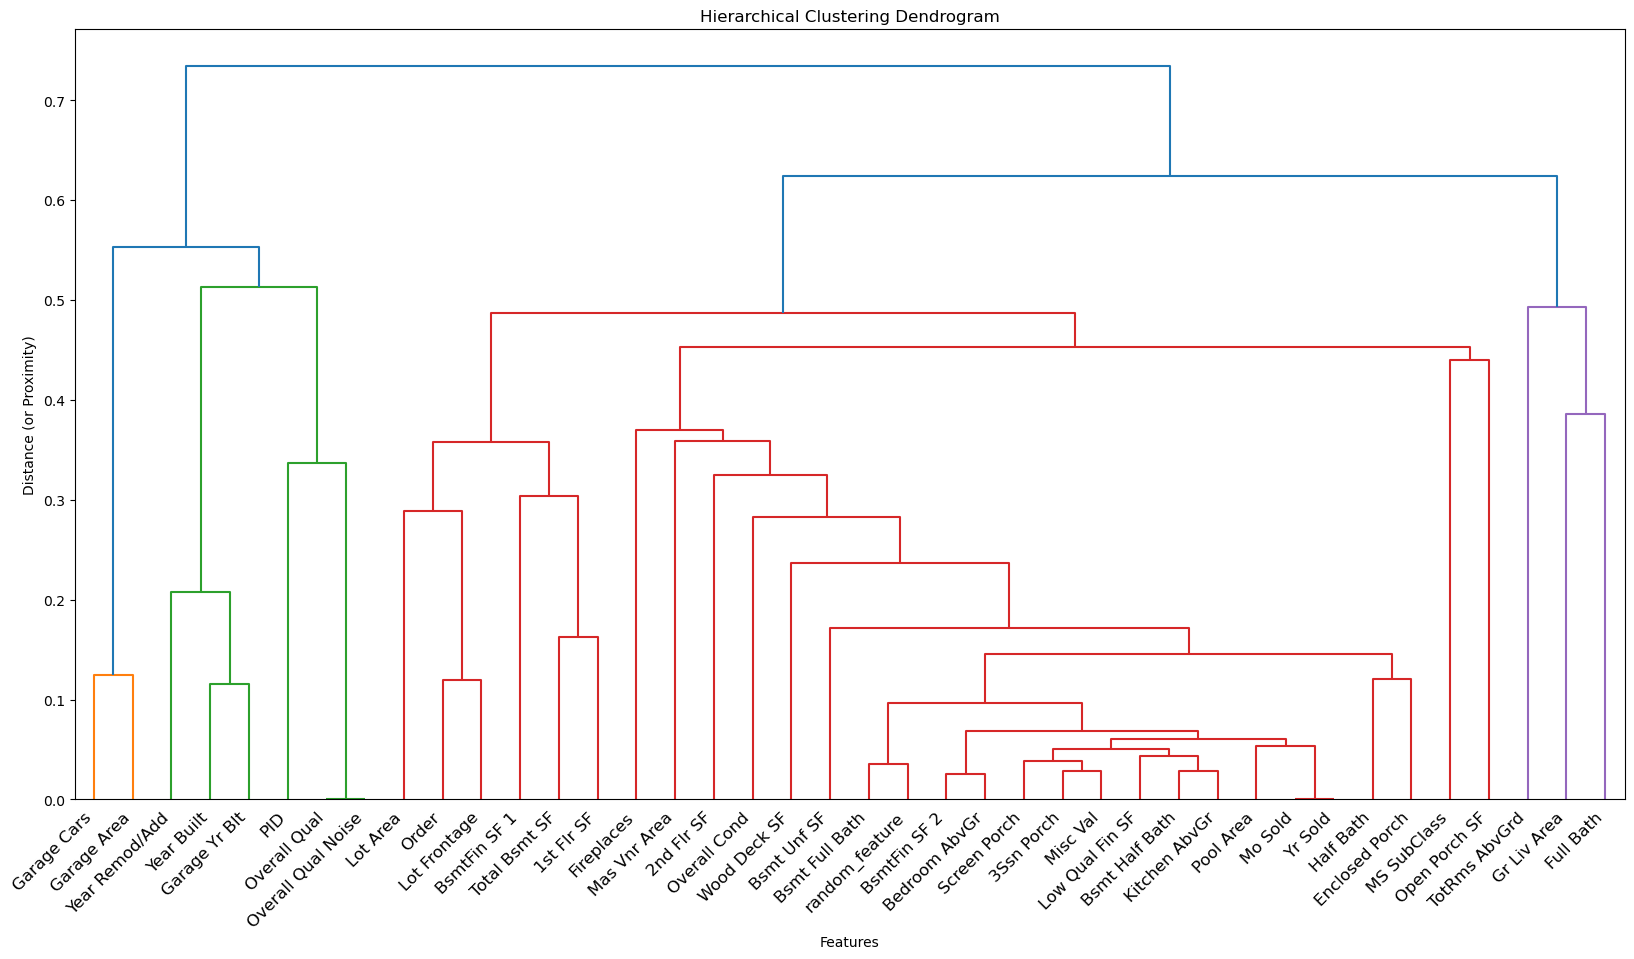

In [ ]:
plot_dendrogram(clustering, labels=matrix.columns)

In [ ]:
# Assuming 'clusters' contains the cluster labels for each feature from your AgglomerativeClustering results
# and 'matrix.columns' contains the feature names

# Group features by their clusters
cluster_groups = {}
for feature, cluster_id in zip(matrix.columns, clusters):
    if cluster_id not in cluster_groups:
        cluster_groups[cluster_id] = []
    cluster_groups[cluster_id].append((feature, synergy_matrix.col_scores[feature]))

# Print features grouped by cluster
for cluster_id, features in cluster_groups.items():
    print(f"Cluster {cluster_id}: {features}")


Cluster 4: [('Order', -0.24461500924125734), ('Lot Frontage', -0.31224411516093736)]
Cluster 13: [('PID', -0.17667263819837115)]
Cluster 17: [('MS SubClass', -0.28666820442556407)]
Cluster 16: [('Lot Area', -0.3161400908218536)]
Cluster 5: [('Overall Qual', -0.17349533842958742), ('Overall Qual Noise', -0.1940979947581837)]
Cluster 18: [('Overall Cond', -0.3205679547169195)]
Cluster 3: [('Year Built', -0.2411623354959743), ('Garage Yr Blt', -0.25771476439795754)]
Cluster 19: [('Year Remod/Add', -0.2737025866578917)]
Cluster 11: [('Mas Vnr Area', -0.3142350387254914)]
Cluster 15: [('BsmtFin SF 1', -0.3161949685673504)]
Cluster 0: [('BsmtFin SF 2', -0.3723501164574622), ('Bsmt Unf SF', -0.3537530296550309), ('Low Qual Fin SF', -0.37086110954961227), ('Bsmt Full Bath', -0.3578836419347858), ('Bsmt Half Bath', -0.3715084793536678), ('Half Bath', -0.34935451335835405), ('Bedroom AbvGr', -0.36404023373330774), ('Kitchen AbvGr', -0.36840206876394016), ('Enclosed Porch', -0.3537502716640462), 

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
import ipywidgets as widgets
from IPython.display import display

# Your existing setup
matrix = synergy_matrix.matrix
scaler = MinMaxScaler(feature_range=(0, 1))
distance_matrix = scaler.fit_transform(-matrix)  # Negating to invert closeness to distance
proximity_matrix = 1 - distance_matrix  # Inverting scaled values for proximity

def plot_interactive_dendrogram(threshold):
    # Reinitialize clustering with the new threshold
    clustering = AgglomerativeClustering(n_clusters=None, metric='precomputed', linkage='average', distance_threshold=threshold)
    clusters = clustering.fit_predict(proximity_matrix)

    # Create the linkage matrix for plotting
    counts = np.zeros(clustering.children_.shape[0])
    n_samples = len(clustering.labels_)
    for i, merge in enumerate(clustering.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # Leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([clustering.children_, clustering.distances_, counts]).astype(float)

    # Output the groups formed at the threshold
    cluster_groups = {i: [] for i in range(max(clusters) + 1)}
    for feature, cluster_id in zip(matrix.columns, clusters):
        cluster_groups[cluster_id].append(feature)
    for k, v in cluster_groups.items():
        print(f"Cluster {k}: {', '.join(v)}")

    # Plot the dendrogram
    plt.figure(figsize=(20, 10))
    dendrogram(linkage_matrix, labels=matrix.columns.tolist(), color_threshold=threshold)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel("Features")
    plt.ylabel("Distance (or Proximity)")
    plt.axhline(y=threshold, color='r', linestyle='--')  # Threshold line
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.show()

# Widget to control the threshold
threshold_slider = widgets.FloatSlider(
    value=0.1,
    min=0,
    max=1,
    step=0.01,
    description='Threshold:',
    continuous_update=False
)

# Display the widget and plotting function interaction
widgets.interact(plot_interactive_dendrogram, threshold=threshold_slider)

interactive(children=(FloatSlider(value=0.1, continuous_update=False, description='Threshold:', max=1.0, step=…

<function __main__.plot_interactive_dendrogram(threshold)>